<a href="https://colab.research.google.com/github/raffaelepojer/DeepLearningAssignment/blob/DL_luna/luna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Accessing to the dataset (in the drive folder)

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

%cd /content/gdrive/MyDrive/dataset\ elisa

Mounted at /content/gdrive
/content/gdrive/MyDrive/dataset elisa


## Start to importing the dataset into pytorch

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd

import os
from torchvision.io import read_image
from torch.utils.data import DataLoader

In [ ]:
'''
df = pd.read_csv('annotations_train.csv')
tmp = df.iloc[df.index[df['id'] == 474], 1:]
tmp
'''

,age,backpack,bag,handbag,clothes,down,up,hair,hat,gender,upblack,upwhite,upred,uppurple,upyellow,upgray,upblue,upgreen,downblack,downwhite,downpink,downpurple,downyellow,downgray,downblue,downgreen,downbrown
0,2,1,1,1,1,2,2,2,1,2,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1


In [ ]:
class ElyImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir

        self.imgs = os.listdir(img_dir)
        self.img_list = self.imgs

        self.imgs = [el for el in self.imgs if os.path.splitext(el)[1] == '.jpg']
        self.lb_ids = [int(el.split('_')[0]) for el in self.imgs]
        self.lb_cams = [int(el.split('_')[1][1]) for el in self.imgs]
        self.imgs = [os.path.join(img_dir, el) for el in self.imgs]

        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_list[idx])
        image = read_image(img_path)
        id = self.lb_ids[idx]

        label = torch.tensor(self.img_labels.iloc[
                                                  self.img_labels.index[self.img_labels['id'] == self.lb_ids[idx]], 1:].values)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, id, label

In [ ]:
training_data = ElyImageDataset('annotations_train.csv', 'train/')

## Show 4 sample in the dataset

0 torch.Size([3, 128, 64]) 447
1 torch.Size([3, 128, 64]) 1093
2 torch.Size([3, 128, 64]) 1110
3 torch.Size([3, 128, 64]) 271


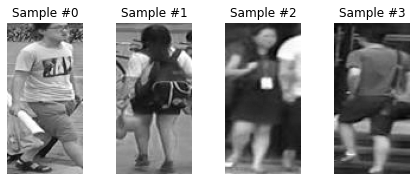

In [ ]:
'''
import matplotlib.pyplot as plt

fig = plt.figure()

for i in range(len(training_data)):
    image, id, label = training_data[i]

    print(i, image.shape, id)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')

    plt.imshow(image[0], cmap='gray')

    if i == 3:
        plt.show()
        break
'''

In [ ]:
labels_map = {
    0: {
        1: 'young',
        2: 'teenager',
        3: 'adult',
        4: 'old'
    },
    1: {
        1: 'no backpack',
        2: 'yes backpack'
    },
    2: {
        1: 'no bag',
        2: 'yes bag'
    },
    3: {
        1: 'no handbag',
        2: 'yes handbag'
    },
    4: {
        1: 'dress',
        2: 'pants'
    },
    5: {
        1: 'long lower body clothing',
        2: 'short'
    },
    6: {
        1: 'long sleeve',
        2: 'short sleeve'
    },
    7: {
        1: 'short hair',
        2: 'long hair'
    },
    8: {
        1: 'no hat',
        2: 'yes hat'
    },
    9: {
        1: 'male',
        2: 'female'
    },
    10: {
        1: 'no upblack',
        2: 'yes upblcak'
    },
    11: {
        1: 'no upwhite',
        2: 'yes upwhite'
    },
    12: {
        1: 'no upred',
        2: 'yes upred'
    },
    13: {
        1: 'no uppurle',
        2: 'yes uppurle'
    },
    14: {
        1: 'no upyellow',
        2: 'yes upyellow'
    },
    15: {
        1: 'no upgray',
        2: 'yes upgray'
    },
    16: {
        1: 'no upblue',
        2: 'yes upblue'
    },
    17: {
        1: 'no upgreen',
        2: 'yes upgreen'
    },
    18: {
        1: 'no downblack',
        2: 'yes downblcak'
    },
    19: {
        1: 'no downwhite',
        2: 'yes downwhite'
    },
    20: {
        1: 'no downpink',
        2: 'yes downpink'
    },
    21: {
        1: 'no downpurple',
        2: 'yes downpurple'
    },
    22: {
        1: 'no downyellow',
        2: 'yes downyellow'
    },
    23: {
        1: 'no downgray',
        2: 'yes downgray'
    },
    24: {
        1: 'no downblue',
        2: 'yes downblue'
    },
    25: {
        1: 'no downgreen',
        2: 'yes downgreen'
    },
    26: {
        1: 'no downbrown',
        2: 'yes downbrown'
    }    
}

Feature batch shape: torch.Size([64, 3, 128, 64])
Labels batch shape: torch.Size([64, 1, 27])


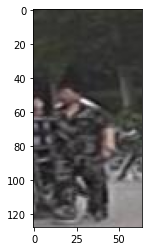

adult
no backpack
no bag
no handbag
pants
long lower body clothing
short sleeve
short hair
no hat
male
no upblack
no upwhite
no upred
no uppurle
no upyellow
yes upgray
no upblue
no upgreen
no downblack
no downwhite
no downpink
no downpurple
no downyellow
yes downgray
no downblue
no downgreen
no downbrown
Label: tensor([3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
        1, 1, 1])


In [ ]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

train_features, train_ids, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
label = train_labels[0].squeeze()
plt.imshow(img.permute(1, 2, 0))
plt.show()

for i in range(len(label)):
  print(labels_map[i][label[i].item()])

print(f"Label: {label}")
